============================================================
### 01 - ANALYSE EXPLORATOIRE DES DONNÉES (AED)
### Projet : Recrutement ML - Classification des candidats
### Dataset : donnees_recrutement.csv
============================================================

In [2]:
# ============= IMPORTS =============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os

In [41]:
# Configuration
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

==========================================
#### SECTION 1.CHARGEMENT DES DONNÉES 
==========================================

In [4]:

df = pd.read_csv('../data/donnees_recrutement.csv')


print(f"Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")

Dimensions : 20000 lignes × 13 colonnes


In [5]:
print("="*70)
print("APERÇU DU DATASET")
print("="*70)

# Affichage des premières lignes
df.head(10)

APERÇU DU DATASET


,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,5,5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
6,6,6,2013-11-11,brun,33.0,12.0,39476.0,M,master,geologie,50.20,oui,0
7,7,7,2012-03-10,roux,31.0,10.0,42392.0,M,licence,forage,62.20,oui,0
8,8,8,2014-10-17,chatain,43.0,10.0,28625.0,M,doctorat,geologie,65.17,non,1
9,9,9,2011-06-04,chatain,28.0,11.0,32454.0,M,master,forage,66.93,non,1


In [6]:
# Suppression de la colonne Unnamed: 0 (index inutile)
df = df.drop('Unnamed: 0', axis=1)
print(" Colonne 'Unnamed: 0' supprimée")

 Colonne 'Unnamed: 0' supprimée


In [7]:
# Informations sur les colonnes
print("\nInformations sur les colonnes :")
print("-"*50)
print(df.info())


Informations sur les colonnes :
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       20000 non-null  int64  
 1   date        19909 non-null  object 
 2   cheveux     19897 non-null  object 
 3   age         19909 non-null  float64
 4   exp         19904 non-null  float64
 5   salaire     19905 non-null  float64
 6   sexe        19900 non-null  object 
 7   diplome     19890 non-null  object 
 8   specialite  19907 non-null  object 
 9   note        19886 non-null  float64
 10  dispo       19894 non-null  object 
 11  embauche    20000 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB
None


In [8]:
# Statistiques descriptives
print("\nStatistiques descriptives des variables numériques :")
print(df.describe())


Statistiques descriptives des variables numériques :
              index           age           exp       salaire          note  \
count  20000.000000  19909.000000  19904.000000  19905.000000  19886.000000   
mean    9999.500000     35.004521      9.500352  34974.343934     75.168762   
std     5773.647028      9.609169      3.012109   5003.099616     17.095926   
min        0.000000     -3.000000     -2.000000  14128.000000      8.680000   
25%     4999.750000     29.000000      7.000000  31596.000000     63.720000   
50%     9999.500000     35.000000      9.000000  34979.000000     75.080000   
75%    14999.250000     41.000000     12.000000  38358.000000     86.617500   
max    19999.000000     74.000000     23.000000  53977.000000    143.220000   

           embauche  
count  20000.000000  
mean       0.114600  
std        0.318547  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


=====================================================
#### SECTION 2 : ANALYSE DE LA QUALITÉ DES DONNÉES
=====================================================

##### 2.1 Valeurs Manquantes

In [9]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs manquantes': missing_values.values,
    'Pourcentage (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Valeurs manquantes', ascending=False)


   Colonne  Valeurs manquantes  Pourcentage (%)
      note                 114            0.570
   diplome                 110            0.550
     dispo                 106            0.530
   cheveux                 103            0.515
      sexe                 100            0.500
       exp                  96            0.480
   salaire                  95            0.475
specialite                  93            0.465
      date                  91            0.455
       age                  91            0.455


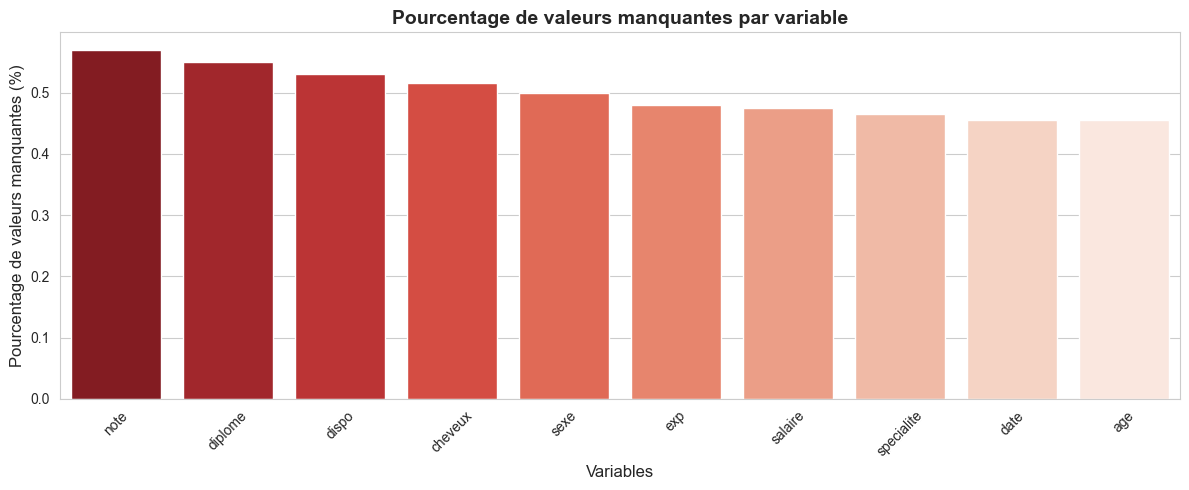

In [10]:
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
    
    # Visualisation des valeurs manquantes
    plt.figure(figsize=(12, 5))
    cols_with_missing = missing_df['Colonne'].tolist()
    sns.barplot(x=cols_with_missing, y=missing_df['Pourcentage (%)'].values, palette='Reds_r')
    plt.title('Pourcentage de valeurs manquantes par variable', fontsize=14, fontweight='bold')
    plt.xlabel('Variables', fontsize=12)
    plt.ylabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../visualizations/valeurs_manquantes.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Aucune valeur manquante détectée dans le dataset !")


**Observation générale** :   
Les valeurs manquantes sont relativement faibles (< 1% pour toutes les variables), ce qui est un bon signe pour la qualité du dataset. Cependant, leur présence doit être expliquée et traitée de manière appropriée.

**Approche méthodologique** :   
 - Analyser le mécanisme de manquance (MCAR/MAR/MNAR) avec des tests statistiques  
 - Tester plusieurs stratégies d'imputation et comparer les performances des modèles  
 - Documenter tous les choix pour garantir la transparence et la reproductibilité  
 - Considérer l'éthique : certaines variables ne devraient pas influencer la décision

##### 2.2 DOUBLONS

In [11]:
duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {duplicates}")

if duplicates > 0:
    print("Des doublons ont été détectés. Analyse recommandée.")
else:
    print("Aucun doublon détecté.")

Nombre de lignes dupliquées : 0
Aucun doublon détecté.


##### 2.3 Types de données 

In [12]:
print(df.dtypes)

index           int64
date           object
cheveux        object
age           float64
exp           float64
salaire       float64
sexe           object
diplome        object
specialite     object
note          float64
dispo          object
embauche        int64
dtype: object


In [13]:
# Vérification de la colonne date
if 'date' in df.columns:
    print(f"\nFormat de la colonne 'date' : {df['date'].dtype}")
    print(f"Exemple de dates : {df['date'].head(3).tolist()}")


Format de la colonne 'date' : object
Exemple de dates : ['2012-06-02', '2011-04-21', '2012-09-07']


=====================================================
#### SECTION 3 : ANALYSE UNIVARIÉE
=====================================================

##### 3.1 Variable cible : embauche

In [14]:
embauche_counts = df['embauche'].value_counts()
embauche_percent = (embauche_counts / len(df)) * 100

print(f"\nRépartition de la variable 'embauche' :")
print(f"  • Non embauchés (0) : {embauche_counts.get(0, 0)} ({embauche_percent.get(0, 0):.2f}%)")
print(f"  • Embauchés (1) : {embauche_counts.get(1, 0)} ({embauche_percent.get(1, 0):.2f}%)")



Répartition de la variable 'embauche' :
  • Non embauchés (0) : 17708 (88.54%)
  • Embauchés (1) : 2292 (11.46%)


**Visualisation** 

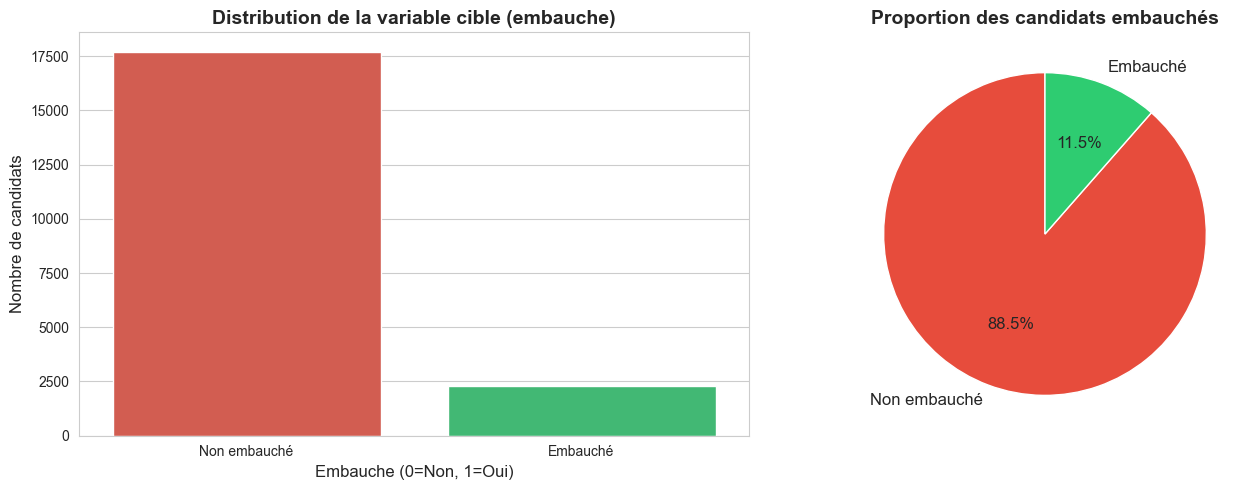

In [15]:
# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Barplot
sns.countplot(data=df, x='embauche', palette=['#e74c3c', '#2ecc71'], ax=axes[0])
axes[0].set_title('Distribution de la variable cible (embauche)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Embauche (0=Non, 1=Oui)', fontsize=12)
axes[0].set_ylabel('Nombre de candidats', fontsize=12)
axes[0].set_xticklabels(['Non embauché', 'Embauché'])

# Graphique 2 : Pie chart
colors = ['#e74c3c', '#2ecc71']
axes[1].pie(embauche_counts, labels=['Non embauché', 'Embauché'], autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Proportion des candidats embauchés', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/distribution_embauche.png', dpi=300, bbox_inches='tight')
plt.show()

**Déséquilibre des classes**

In [16]:
ratio = embauche_counts.max() / embauche_counts.min()
print(f"\nRatio entre les classes majoritaire et minoritaire : {ratio:.2f}")


Ratio entre les classes majoritaire et minoritaire : 7.73


la base de données contient presque 8 fois plus de candidats non embauchés que de candidats embauchés.
ce qui indique un déséquilibre significatif des classes.
dans ce cas, il est recommandé d'envisager des techniques de rééquilibrage 
des classes lors de la modélisation (comme SMOTE, class_weight, etc.) pour améliorer les performances du modèle.

##### 3.2 Variables numériques

In [17]:
numeric_cols = ['age', 'exp', 'salaire', 'note']
available_numeric = [col for col in numeric_cols if col in df.columns]

for col in available_numeric:
    print(f"\n Variable : {col.upper()}")
    print(f"   • Moyenne : {df[col].mean():.2f}")
    print(f"   • Médiane : {df[col].median():.2f}")
    print(f"   • Écart-type : {df[col].std():.2f}")
    print(f"   • Min : {df[col].min():.2f} | Max : {df[col].max():.2f}")
    print(f"   • Valeurs manquantes : {df[col].isnull().sum()}")



 Variable : AGE
   • Moyenne : 35.00
   • Médiane : 35.00
   • Écart-type : 9.61
   • Min : -3.00 | Max : 74.00
   • Valeurs manquantes : 91

 Variable : EXP
   • Moyenne : 9.50
   • Médiane : 9.00
   • Écart-type : 3.01
   • Min : -2.00 | Max : 23.00
   • Valeurs manquantes : 96

 Variable : SALAIRE
   • Moyenne : 34974.34
   • Médiane : 34979.00
   • Écart-type : 5003.10
   • Min : 14128.00 | Max : 53977.00
   • Valeurs manquantes : 95

 Variable : NOTE
   • Moyenne : 75.17
   • Médiane : 75.08
   • Écart-type : 17.10
   • Min : 8.68 | Max : 143.22
   • Valeurs manquantes : 114


les ages et les expériences (age, exp) ont des valeurs négatives ce qui n'a pas de sens. 
dans un contexte de recrutement, l'age doit être positif supérieur à 15 et l'expérience commence par 0.
dans la phase prétraitement; elles seront imputées en phase avec le diplome et le salaire par souci d'une bonne modélisation.

**visalisation de la distribution des variables numériques**

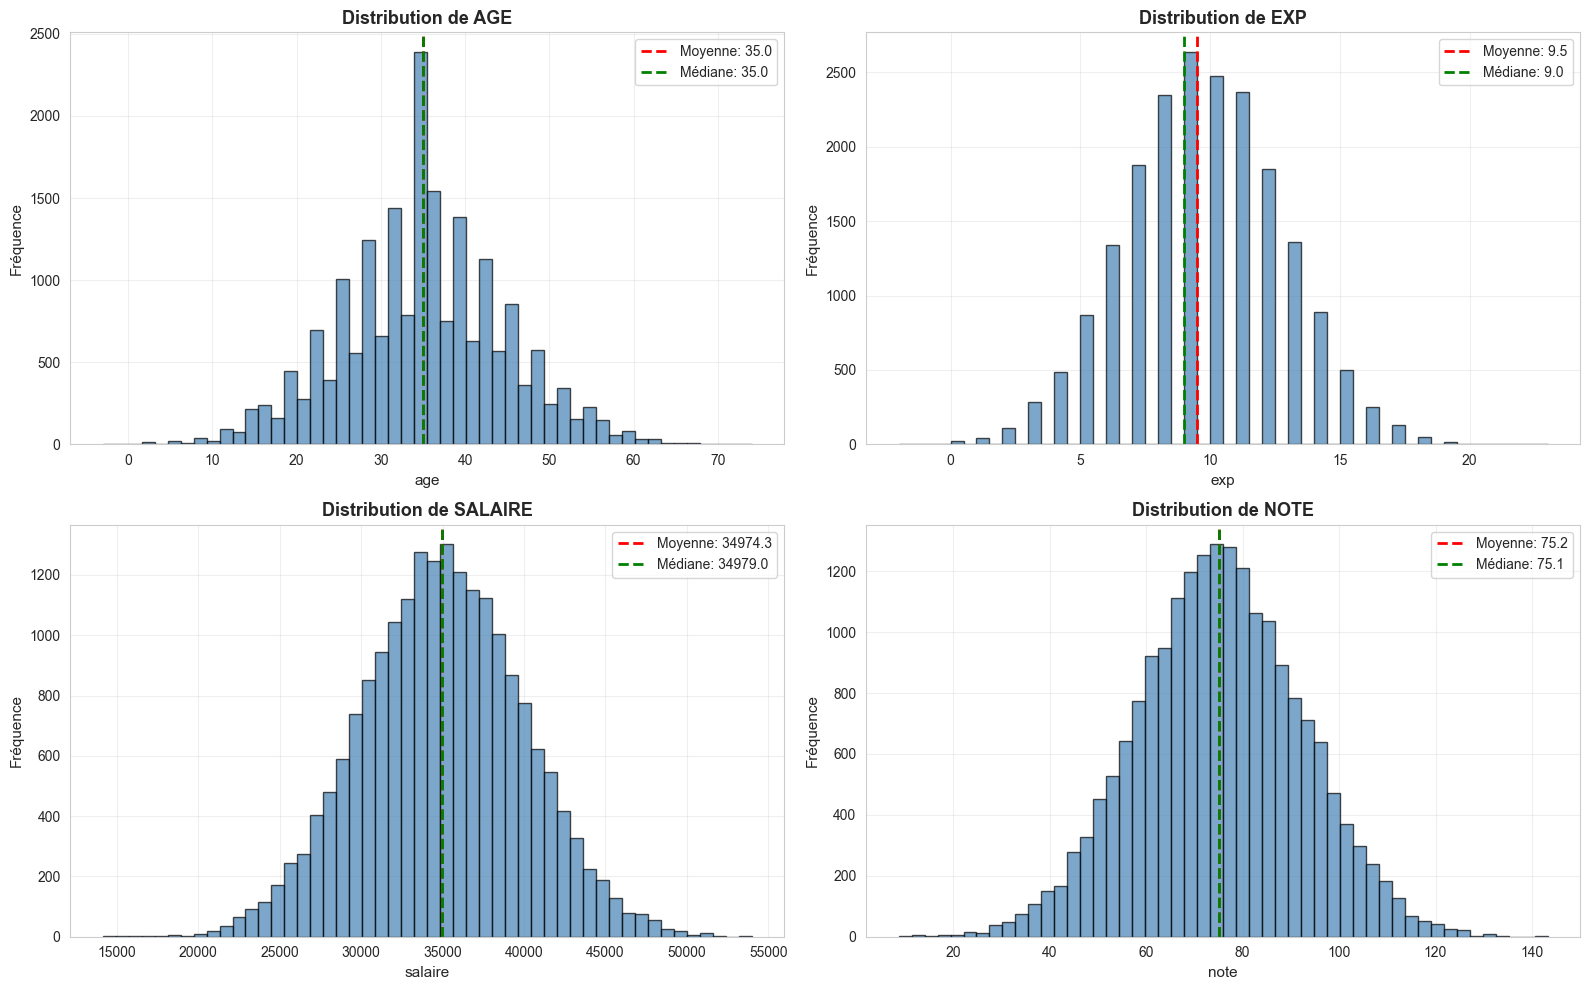

In [18]:
# Visualisation des distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(available_numeric):
    # Histogramme avec KDE
    axes[idx].hist(df[col].dropna(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Distribution de {col.upper()}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Fréquence', fontsize=11)
    axes[idx].grid(alpha=0.3)
    
    # Ajouter des statistiques
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Médiane: {median_val:.1f}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('../visualizations/distributions_numeriques.png', dpi=300, bbox_inches='tight')
plt.show()

**Boxplots pour detecter les outliers**

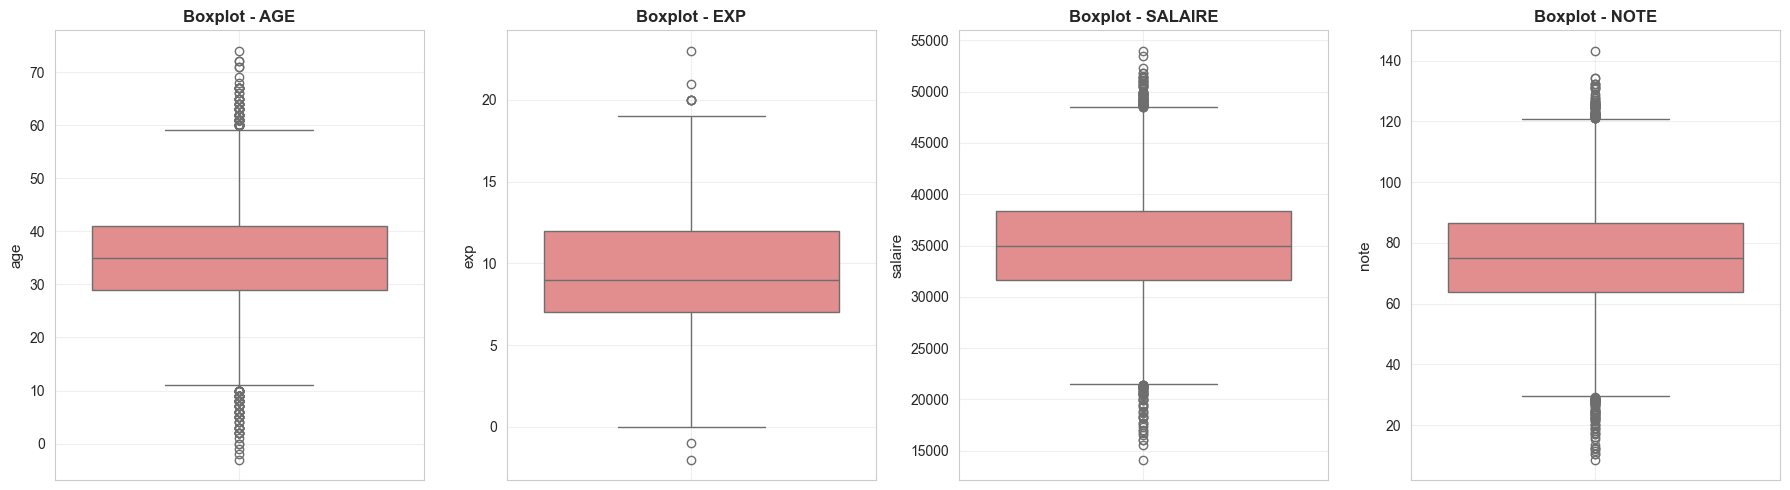

In [19]:
# Boxplots pour détecter les outliers
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for idx, col in enumerate(available_numeric):
    sns.boxplot(y=df[col], ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'Boxplot - {col.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/boxplots_numeriques.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Détection des valeurs aberrantes
print("\n DÉTECTION DES VALEURS ABERRANTES (méthode IQR) :")
print("-" * 80)

for col in available_numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\n{col.upper()} :")
    print(f"   • Limites : [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"   • Valeurs aberrantes : {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    
    if col == 'note' and df[col].max() > 100:
        print(f"   ATTENTION : Notes > 100 détectées ! Maximum = {df[col].max()}")
    if col == 'age' and (df[col].min() < 18 or df[col].max() > 70):
        print(f"   ATTENTION : Âges inhabituels détectés ! Min = {df[col].min()}, Max = {df[col].max()}")



 DÉTECTION DES VALEURS ABERRANTES (méthode IQR) :
--------------------------------------------------------------------------------

AGE :
   • Limites : [11.00, 59.00]
   • Valeurs aberrantes : 215 (1.07%)
   ATTENTION : Âges inhabituels détectés ! Min = -3.0, Max = 74.0

EXP :
   • Limites : [-0.50, 19.50]
   • Valeurs aberrantes : 8 (0.04%)

SALAIRE :
   • Limites : [21453.00, 48501.00]
   • Valeurs aberrantes : 123 (0.61%)

NOTE :
   • Limites : [29.37, 120.96]
   • Valeurs aberrantes : 149 (0.74%)
   ATTENTION : Notes > 100 détectées ! Maximum = 143.22


##### 3.3 Variables catégorielles

In [21]:
categorical_cols = ['cheveux', 'sexe', 'diplome', 'specialite', 'dispo']
available_categorical = [col for col in categorical_cols if col in df.columns]

for col in available_categorical:
    print(f"\nVariable : {col.upper()}")
    value_counts = df[col].value_counts()
    print(value_counts)
    print(f"   • Nombre de catégories uniques : {df[col].nunique()}")


Variable : CHEVEUX
cheveux
chatain    6022
brun       5991
blond      5929
roux       1955
Name: count, dtype: int64
   • Nombre de catégories uniques : 4

Variable : SEXE
sexe
M    11889
F     8011
Name: count, dtype: int64
   • Nombre de catégories uniques : 2

Variable : DIPLOME
diplome
master      7513
licence     7377
doctorat    2547
bac         2453
Name: count, dtype: int64
   • Nombre de catégories uniques : 4

Variable : SPECIALITE
specialite
geologie       10028
forage          4340
detective       4155
archeologie     1384
Name: count, dtype: int64
   • Nombre de catégories uniques : 4

Variable : DISPO
dispo
non    11848
oui     8046
Name: count, dtype: int64
   • Nombre de catégories uniques : 2


**visaulisation**

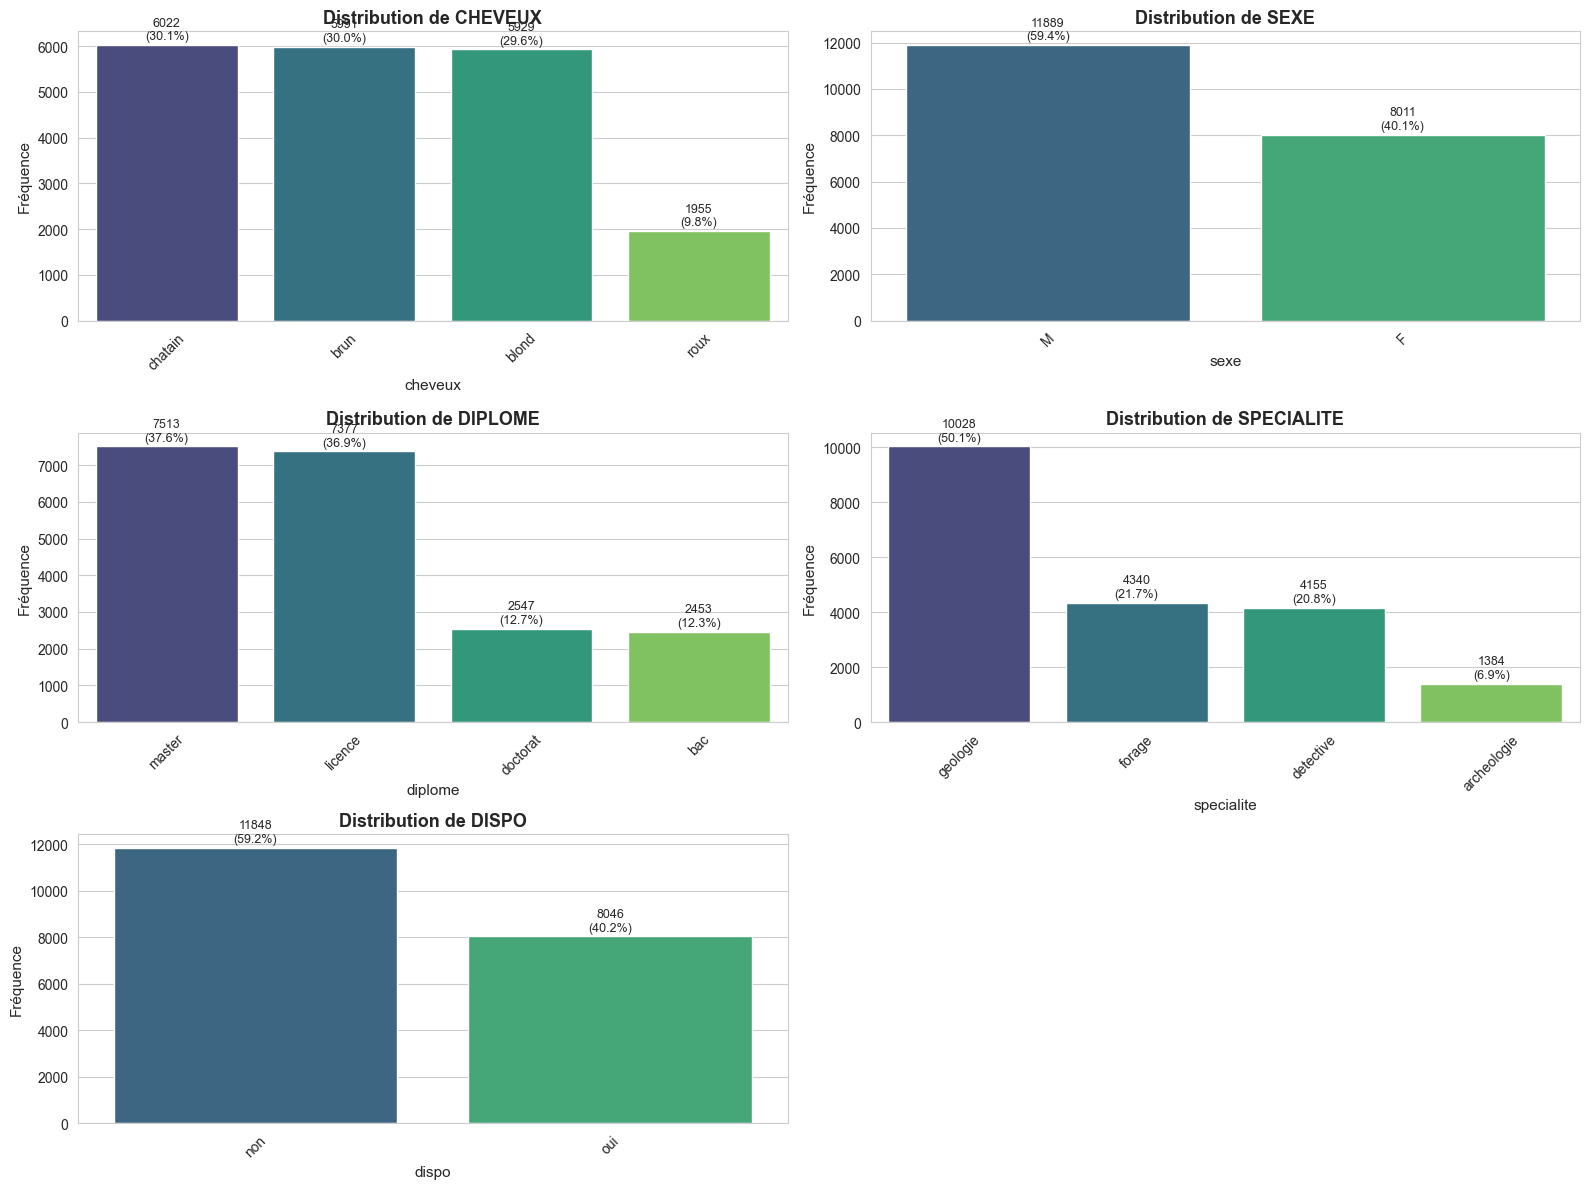

In [22]:
# Visualisation des variables catégorielles
n_cat = len(available_categorical)
n_rows = (n_cat + 1) // 2
fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows * 4))
axes = axes.ravel()

for idx, col in enumerate(available_categorical):
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'Distribution de {col.upper()}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Fréquence', fontsize=11)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Ajouter les pourcentages sur les barres
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + max(value_counts.values) * 0.01, f'{v}\n({v/len(df)*100:.1f}%)',
                      ha='center', va='bottom', fontsize=9)

# Masquer les axes inutilisés
for idx in range(len(available_categorical), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../visualizations/distributions_categoriques.png', dpi=300, bbox_inches='tight')
plt.show()

=====================================================
#### SECTION 4 : ANALYSE BIVARIÉE
=====================================================

##### 4.1 Corrélations entre variables numériques

In [23]:
# Calculer la matrice de corrélation
correlation_matrix = df[available_numeric].corr()
print(correlation_matrix)

              age       exp   salaire      note
age      1.000000 -0.002786  0.001161 -0.007534
exp     -0.002786  1.000000  0.009709 -0.012195
salaire  0.001161  0.009709  1.000000 -0.448422
note    -0.007534 -0.012195 -0.448422  1.000000


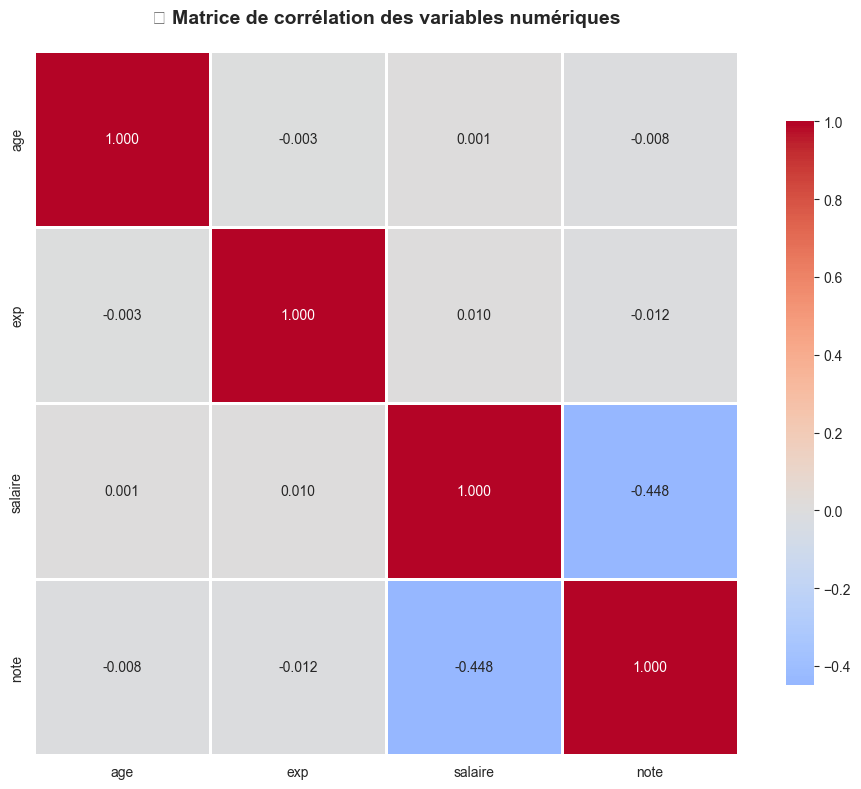

In [24]:
# Visualisation - Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('📊 Matrice de corrélation des variables numériques', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../visualizations/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [27]:
# Identifier les corrélations fortes
print("\nCorrélations significatives (|r| > 0.5) :")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.4:
            print(f"   • {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]} : {corr_val:.3f}")



Corrélations significatives (|r| > 0.5) :
   • salaire ↔ note : -0.448


##### 4.2 Relations avec la variable cible (embauche)

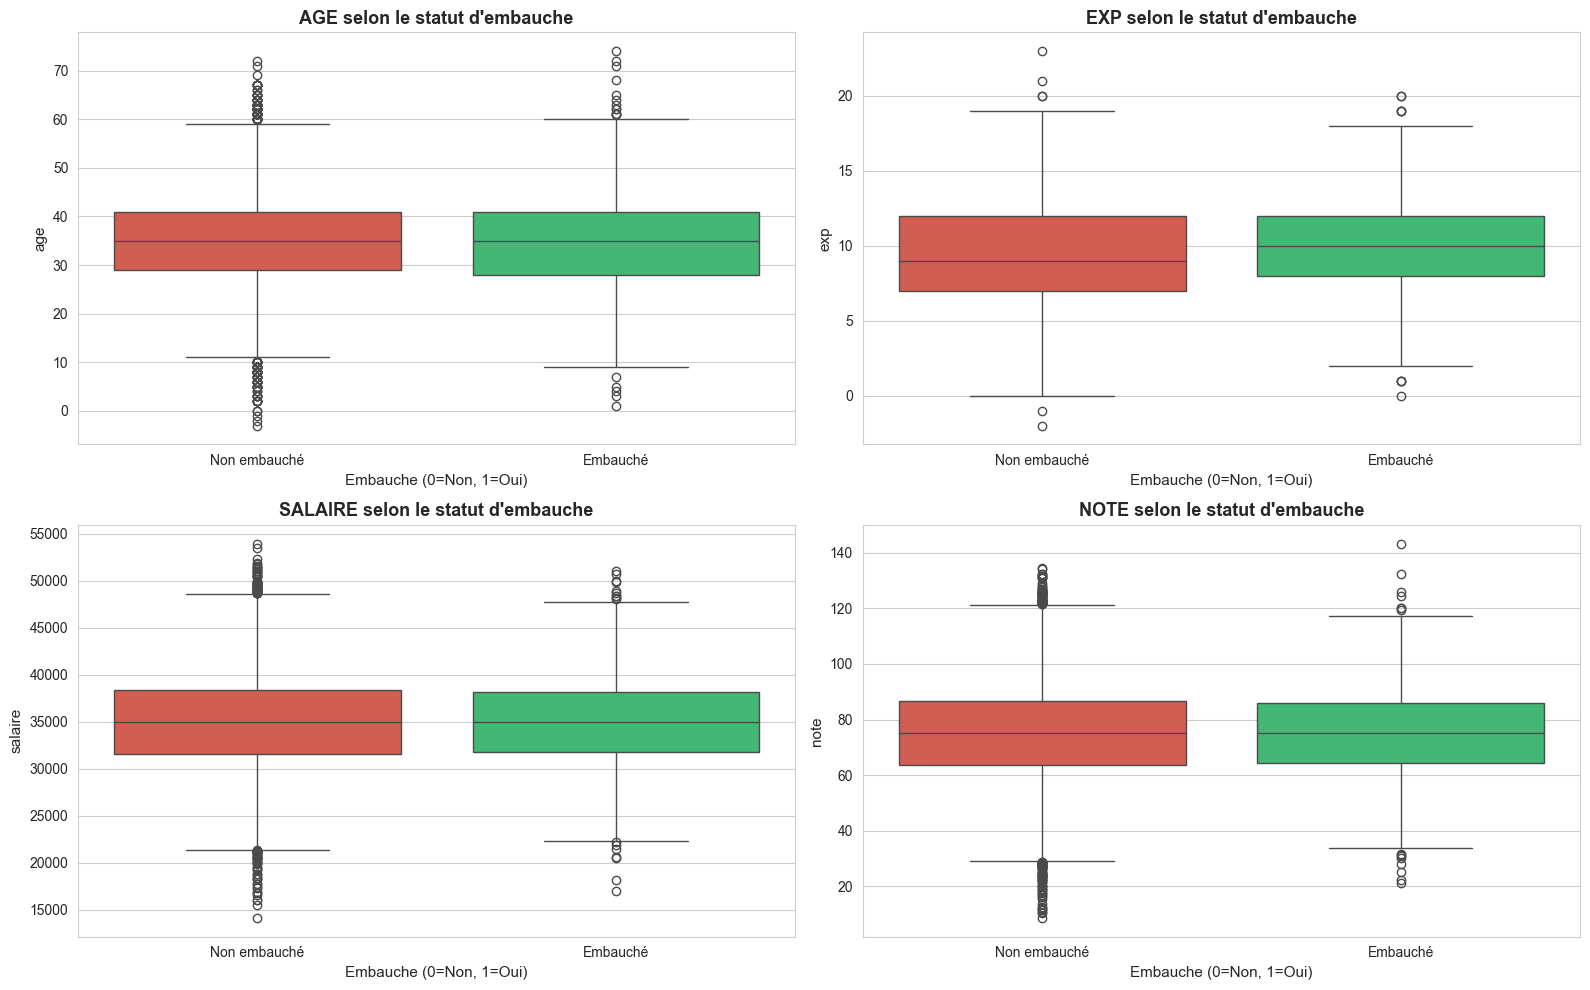

In [28]:
# Variables numériques vs embauche
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(available_numeric):
    sns.boxplot(data=df, x='embauche', y=col, ax=axes[idx], palette=['#e74c3c', '#2ecc71'])
    axes[idx].set_title(f'{col.upper()} selon le statut d\'embauche', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Embauche (0=Non, 1=Oui)', fontsize=11)
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].set_xticklabels(['Non embauché', 'Embauché'])

plt.tight_layout()
plt.savefig('../visualizations/numeriques_vs_embauche.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
# Statistiques comparatives
print("\nComparaison des moyennes selon le statut d'embauche :")
print("-" * 80)
for col in available_numeric:
    mean_not_hired = df[df['embauche'] == 0][col].mean()
    mean_hired = df[df['embauche'] == 1][col].mean()
    diff = mean_hired - mean_not_hired
    diff_percent = (diff / mean_not_hired) * 100 if mean_not_hired != 0 else 0
    
    print(f"\n{col.upper()} :")
    print(f"   • Non embauchés : {mean_not_hired:.2f}")
    print(f"   • Embauchés : {mean_hired:.2f}")
    print(f"   • Différence : {diff:+.2f} ({diff_percent:+.1f}%)")


Comparaison des moyennes selon le statut d'embauche :
--------------------------------------------------------------------------------

AGE :
   • Non embauchés : 35.04
   • Embauchés : 34.69
   • Différence : -0.35 (-1.0%)

EXP :
   • Non embauchés : 9.49
   • Embauchés : 9.56
   • Différence : +0.06 (+0.7%)

SALAIRE :
   • Non embauchés : 34970.12
   • Embauchés : 35006.88
   • Différence : +36.76 (+0.1%)

NOTE :
   • Non embauchés : 75.15
   • Embauchés : 75.31
   • Différence : +0.16 (+0.2%)



Distribution des variables catégorielles selon l'embauche :
--------------------------------------------------------------------------------


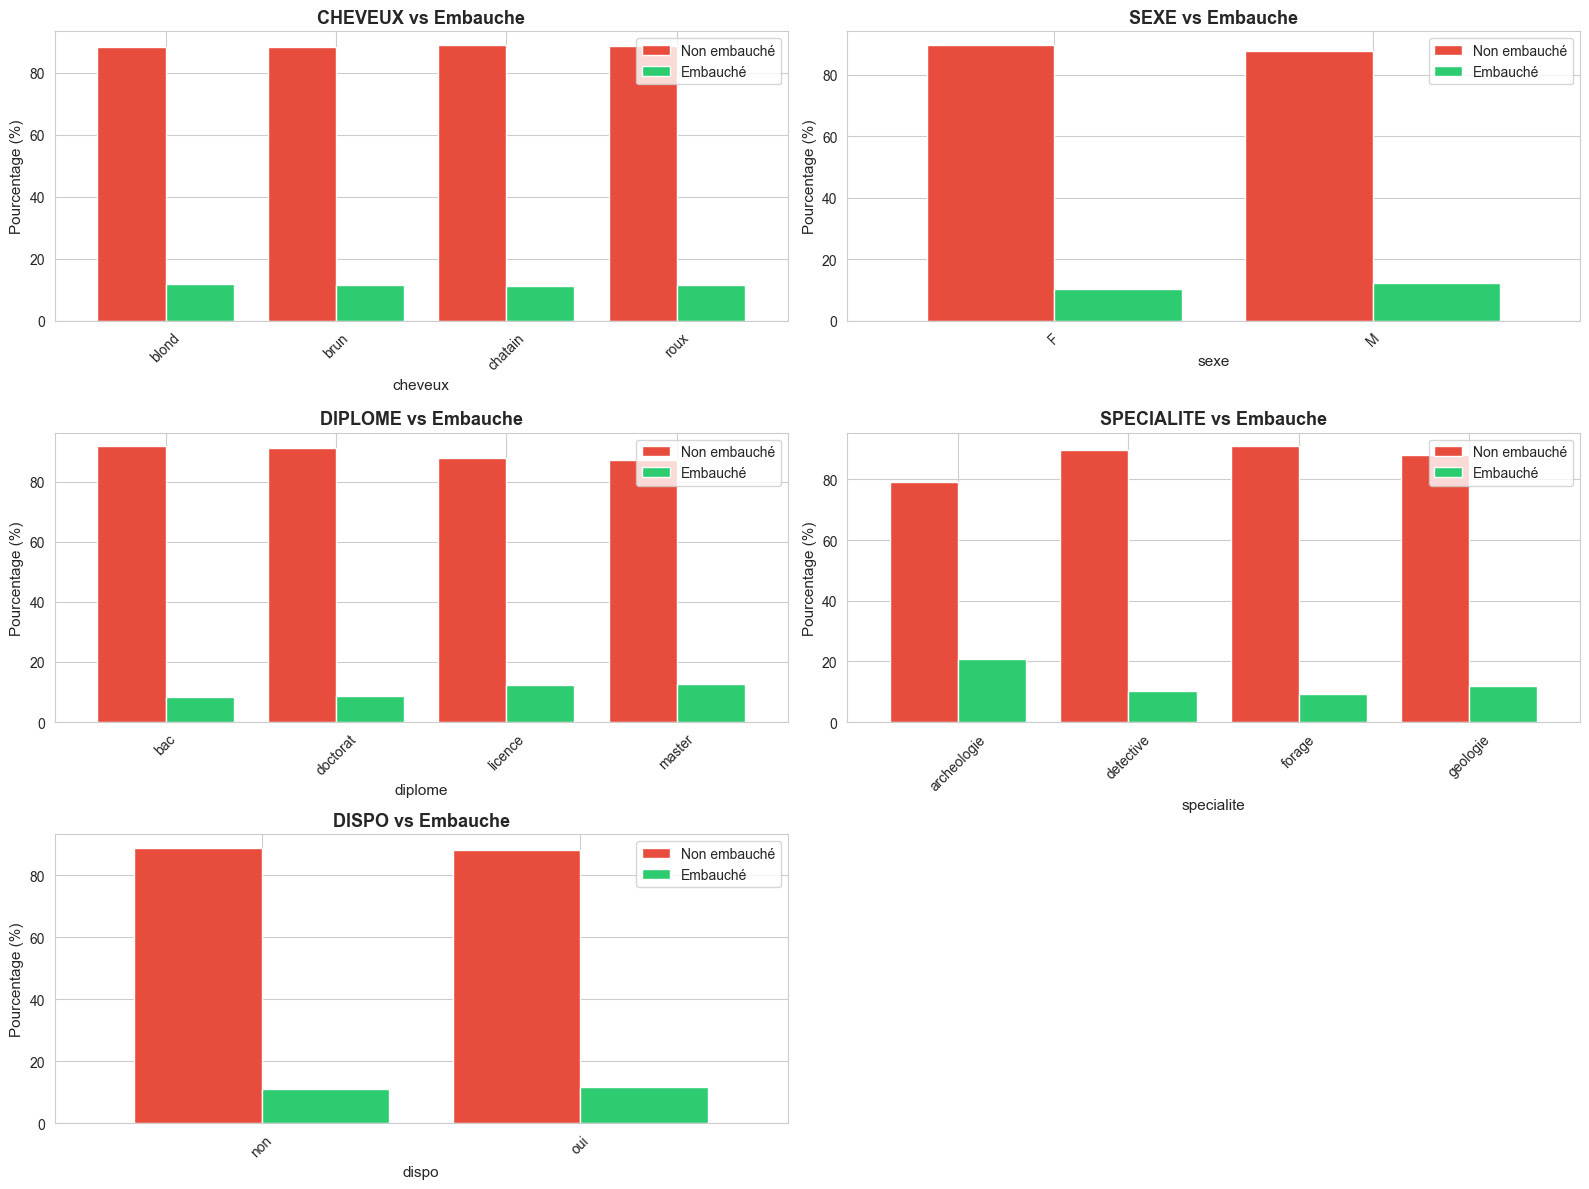

In [32]:
# Variables catégorielles vs embauche
print("\nDistribution des variables catégorielles selon l'embauche :")
print("-" * 80)

n_cat = len(available_categorical)
n_rows = (n_cat + 1) // 2
fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows * 4))
axes = axes.ravel()

for idx, col in enumerate(available_categorical):
    crosstab = pd.crosstab(df[col], df['embauche'], normalize='index') * 100
    crosstab.plot(kind='bar', ax=axes[idx], color=['#e74c3c', '#2ecc71'], width=0.8)
    axes[idx].set_title(f'{col.upper()} vs Embauche', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Pourcentage (%)', fontsize=11)
    axes[idx].legend(['Non embauché', 'Embauché'], loc='best')
    axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len(available_categorical), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../visualizations/categoriques_vs_embauche.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
# Taux d'embauche par catégorie
for col in available_categorical:
    print(f"\nTaux d'embauche par {col.upper()} :")
    embauche_rate = df.groupby(col)['embauche'].agg(['sum', 'count', 'mean'])
    embauche_rate.columns = ['Embauchés', 'Total', 'Taux (%)']
    embauche_rate['Taux (%)'] = embauche_rate['Taux (%)'] * 100
    print(embauche_rate.sort_values('Taux (%)', ascending=False))



Taux d'embauche par CHEVEUX :
         Embauchés  Total   Taux (%)
cheveux                             
blond          694   5929  11.705178
brun           697   5991  11.634118
roux           224   1955  11.457801
chatain        669   6022  11.109266

Taux d'embauche par SEXE :
      Embauchés  Total   Taux (%)
sexe                             
M          1456  11889  12.246615
F           824   8011  10.285857

Taux d'embauche par DIPLOME :
          Embauchés  Total   Taux (%)
diplome                              
master          951   7513  12.658059
licence         897   7377  12.159414
doctorat        223   2547   8.755399
bac             204   2453   8.316347

Taux d'embauche par SPECIALITE :
             Embauchés  Total   Taux (%)
specialite                              
archeologie        287   1384  20.736994
geologie          1181  10028  11.777024
detective          421   4155  10.132371
forage             396   4340   9.124424

Taux d'embauche par DISPO :
       Embauché

=====================================================
#### SECTION 5 : ANALYSE TEMPORELLE
=====================================================

In [36]:
# Extraire les informations temporelles
df['annee'] = df['date'].dt.year
df['mois'] = df['date'].dt.month
df['mois_nom'] = df['date'].dt.month_name()
df['trimestre'] = df['date'].dt.quarter
df['annee_mois'] = df['date'].dt.to_period('M')
df['annee_trimestre'] = df['date'].dt.to_period('Q')

print("✓ Données chargées et préparées")
print(f"  Période : {df['date'].min()} → {df['date'].max()}")
print(f"  Nombre total de candidatures : {len(df)}")

✓ Données chargées et préparées
  Période : 2010-01-01 00:00:00 → 2014-12-31 00:00:00
  Nombre total de candidatures : 20000



Conversion de la colonne 'date' réussie
   • Période couverte : 2010-01-01 00:00:00 à 2014-12-31 00:00:00


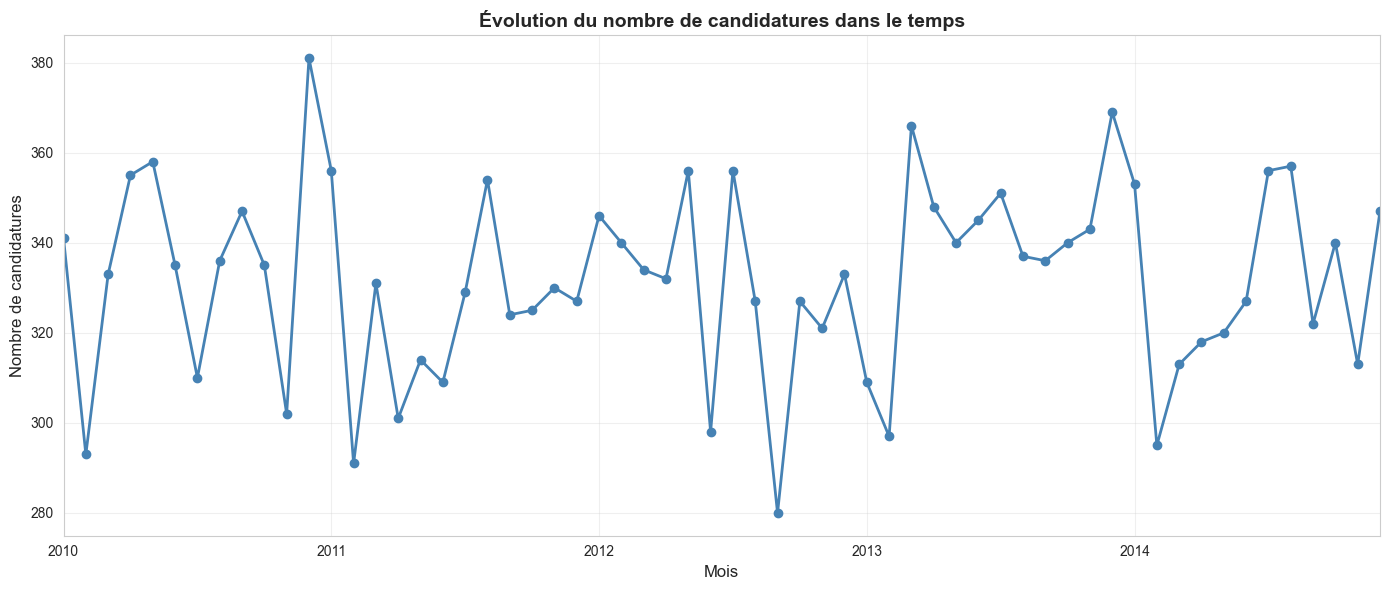

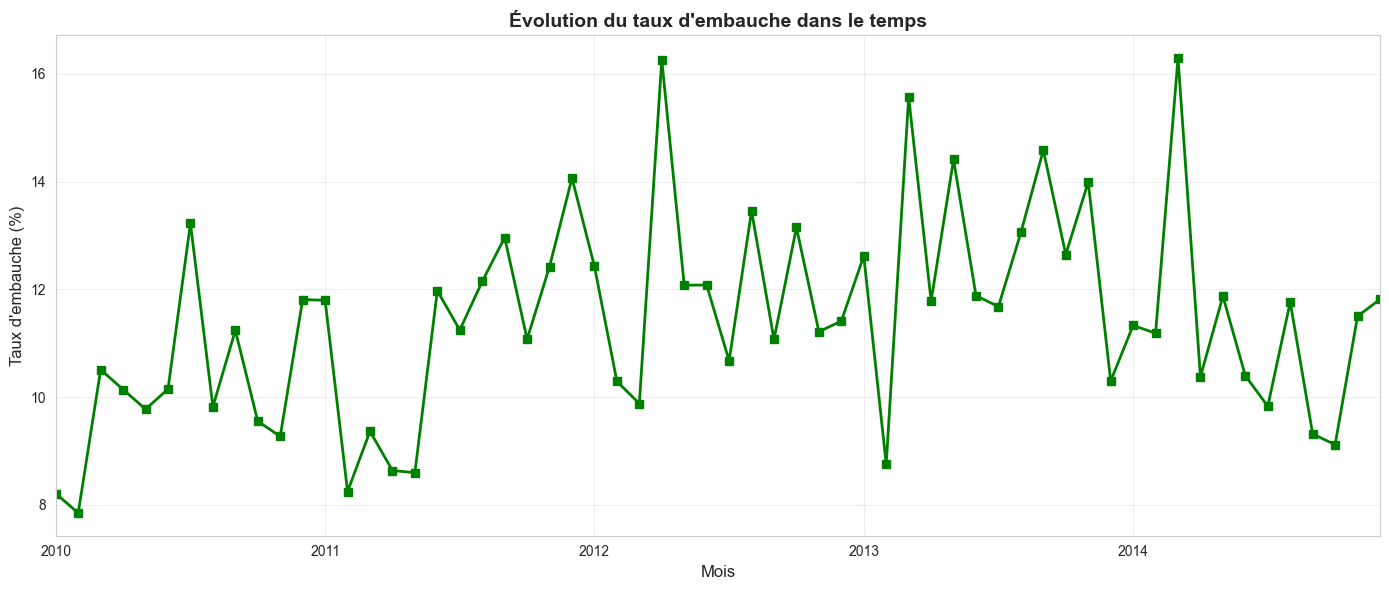

In [35]:
if 'date' in df.columns:
    # Conversion en datetime
    try:
        df['date'] = pd.to_datetime(df['date'])
        df['annee'] = df['date'].dt.year
        df['mois'] = df['date'].dt.month
        
        print("\nConversion de la colonne 'date' réussie")
        print(f"   • Période couverte : {df['date'].min()} à {df['date'].max()}")
        
        # Évolution des candidatures dans le temps
        candidatures_par_mois = df.groupby(df['date'].dt.to_period('M')).size()
        
        plt.figure(figsize=(14, 6))
        candidatures_par_mois.plot(kind='line', marker='o', color='steelblue', linewidth=2)
        plt.title('Évolution du nombre de candidatures dans le temps', fontsize=14, fontweight='bold')
        plt.xlabel('Mois', fontsize=12)
        plt.ylabel('Nombre de candidatures', fontsize=12)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig('../visualizations/evolution_temporelle.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Taux d'embauche par période
        embauche_par_mois = df.groupby(df['date'].dt.to_period('M'))['embauche'].mean() * 100
        
        plt.figure(figsize=(14, 6))
        embauche_par_mois.plot(kind='line', marker='s', color='green', linewidth=2)
        plt.title('Évolution du taux d\'embauche dans le temps', fontsize=14, fontweight='bold')
        plt.xlabel('Mois', fontsize=12)
        plt.ylabel('Taux d\'embauche (%)', fontsize=12)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig('../visualizations/taux_embauche_temporel.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    except Exception as e:
        print(f"Erreur lors de la conversion de la date : {e}")

L'analyse croisée des données de recrutement sur la période 2010-2014 révèle un paradoxe significatif : alors que le volume de candidatures reste stable autour de 340 par mois, le taux d'embauche fluctue fortement entre 8% et 16,5%, et surtout, ces deux métriques évoluent de manière **inverse**. Août 2012 illustre parfaitement ce phénomène avec le taux d'embauche maximum (16,5%) malgré le nombre minimal de candidatures (280), tandis que janvier 2013 présente la situation opposée avec un taux minimal (8,8%) lors d'un pic de candidatures (367). Cette relation contre-intuitive suggère que la qualité des candidatures prime sur leur quantité, les périodes de fort afflux étant potentiellement associées à une dilution des profils pertinents ou à une inadéquation avec les besoins réels de l'entreprise. Ce constat souligne l'importance d'une stratégie de recrutement axée sur le ciblage qualitatif plutôt que sur l'attraction massive, et invite à approfondir l'analyse pour identifier les facteurs saisonniers, les caractéristiques des candidats retenus et optimiser ainsi le processus de sélection en fonction des cycles observés.


ANALYSE PAR TRIMESTRE

Statistiques par trimestre :
                 nb_embauches  total_candidatures  taux_embauche_pct
annee_trimestre                                                     
2010Q1                     86                 967                9.0
2010Q2                    105                1048               10.0
2010Q3                    113                 993               11.0
2010Q4                    105                1018               10.0
2011Q1                     97                 978               10.0
2011Q2                     90                 924               10.0
2011Q3                    122                1007               12.0
2011Q4                    123                 982               13.0
2012Q1                    111                1020               11.0
2012Q2                    133                 986               13.0

✓ Graphique sauvegardé : analyse_trimestre.png


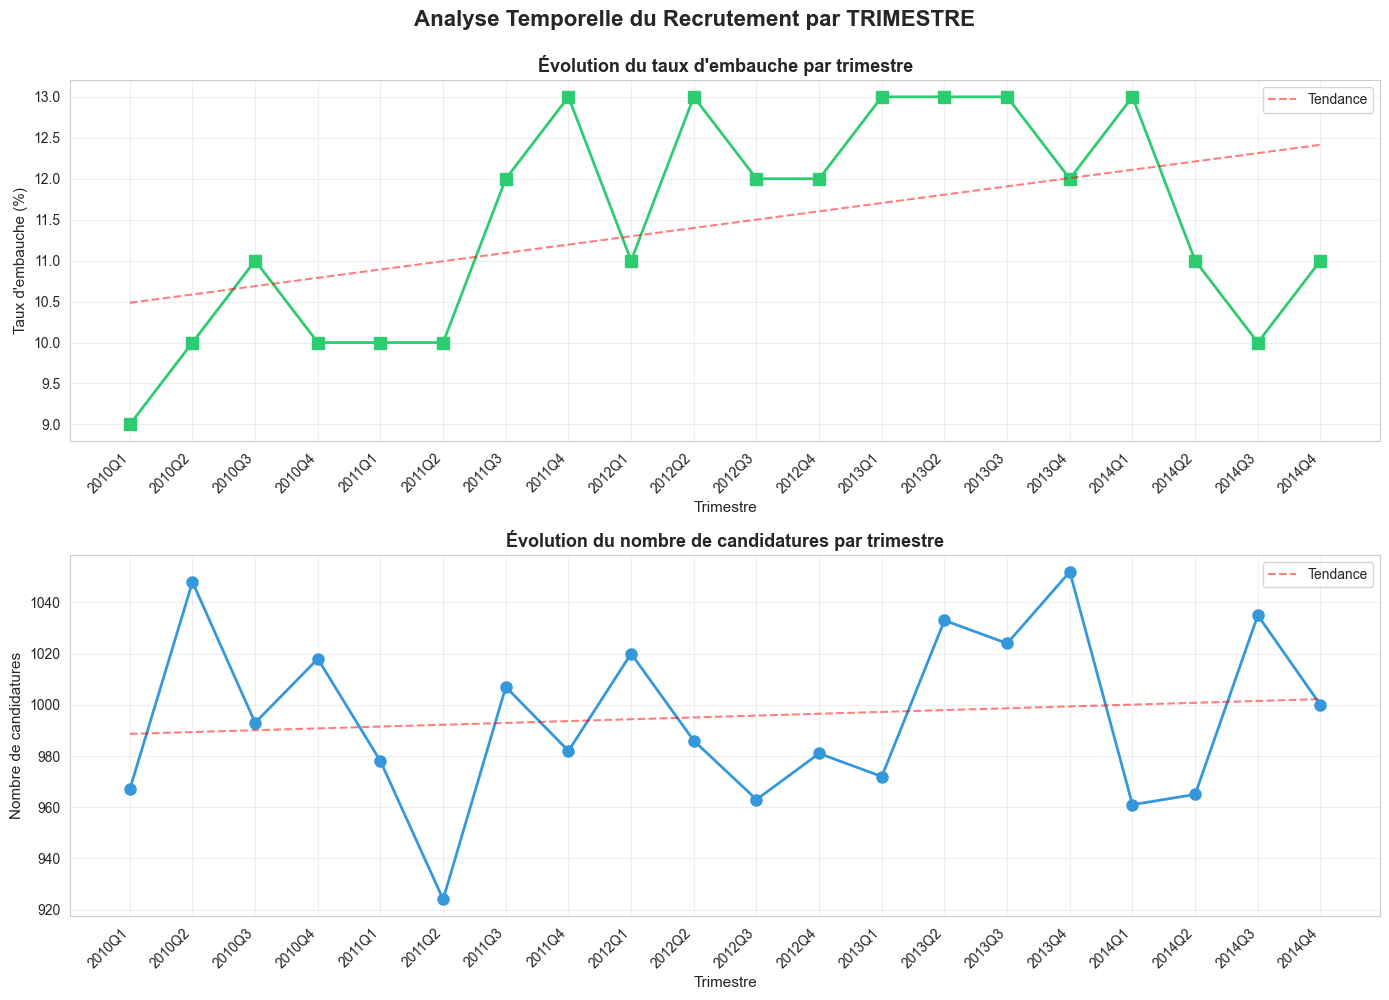

In [37]:
# =============================================================================
# ANALYSE PAR TRIMESTRE
# =============================================================================

print("\n" + "="*80)
print("ANALYSE PAR TRIMESTRE")
print("="*80)

# Calculer les métriques par trimestre
trimestre_stats = df.groupby('annee_trimestre').agg({
    'embauche': ['sum', 'count', 'mean'],
    'index': 'count'
}).round(2)

trimestre_stats.columns = ['nb_embauches', 'total_candidatures', 'taux_embauche', 'verification']
trimestre_stats['taux_embauche_pct'] = (trimestre_stats['taux_embauche'] * 100).round(2)

print("\nStatistiques par trimestre :")
print(trimestre_stats[['nb_embauches', 'total_candidatures', 'taux_embauche_pct']].head(10))

# Créer la figure avec 2 sous-graphiques pour les trimestres
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Analyse Temporelle du Recrutement par TRIMESTRE', 
             fontsize=16, fontweight='bold', y=0.995)

# Graphique 1 : Taux d'embauche par trimestre
ax1.plot(range(len(trimestre_stats)), trimestre_stats['taux_embauche_pct'], 
         marker='s', linewidth=2, markersize=8, color='#2ecc71')
ax1.set_title("Évolution du taux d'embauche par trimestre", fontsize=13, fontweight='bold')
ax1.set_xlabel("Trimestre", fontsize=11)
ax1.set_ylabel("Taux d'embauche (%)", fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(len(trimestre_stats)))
ax1.set_xticklabels(trimestre_stats.index.astype(str), rotation=45, ha='right')

# Ajouter une ligne de tendance
z = np.polyfit(range(len(trimestre_stats)), trimestre_stats['taux_embauche_pct'], 1)
p = np.poly1d(z)
ax1.plot(range(len(trimestre_stats)), p(range(len(trimestre_stats))), 
         "r--", alpha=0.5, linewidth=1.5, label='Tendance')
ax1.legend()

# Graphique 2 : Nombre de candidatures par trimestre
ax2.plot(range(len(trimestre_stats)), trimestre_stats['total_candidatures'], 
         marker='o', linewidth=2, markersize=8, color='#3498db')
ax2.set_title("Évolution du nombre de candidatures par trimestre", fontsize=13, fontweight='bold')
ax2.set_xlabel("Trimestre", fontsize=11)
ax2.set_ylabel("Nombre de candidatures", fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(len(trimestre_stats)))
ax2.set_xticklabels(trimestre_stats.index.astype(str), rotation=45, ha='right')

# Ajouter une ligne de tendance
z2 = np.polyfit(range(len(trimestre_stats)), trimestre_stats['total_candidatures'], 1)
p2 = np.poly1d(z2)
ax2.plot(range(len(trimestre_stats)), p2(range(len(trimestre_stats))), 
         "r--", alpha=0.5, linewidth=1.5, label='Tendance')
ax2.legend()

plt.tight_layout()
plt.savefig('analyse_trimestre.png', dpi=300, bbox_inches='tight')
print("\n✓ Graphique sauvegardé : analyse_trimestre.png")
plt.show()


ANALYSE PAR MOIS (toutes années confondues)

Statistiques moyennes par mois :
      nb_embauches  total_candidatures  taux_embauche_pct
mois                                                     
1.0            192                1705               11.0
2.0            141                1516                9.0
3.0            207                1677               12.0
4.0            190                1654               11.0
5.0            192                1688               11.0
6.0            182                1614               11.0
7.0            192                1702               11.0
8.0            206                1711               12.0
9.0            191                1609               12.0
10.0           185                1667               11.0
11.0           189                1609               12.0
12.0           208                1757               12.0

✓ Graphique sauvegardé : analyse_mois_saisonnalite.png


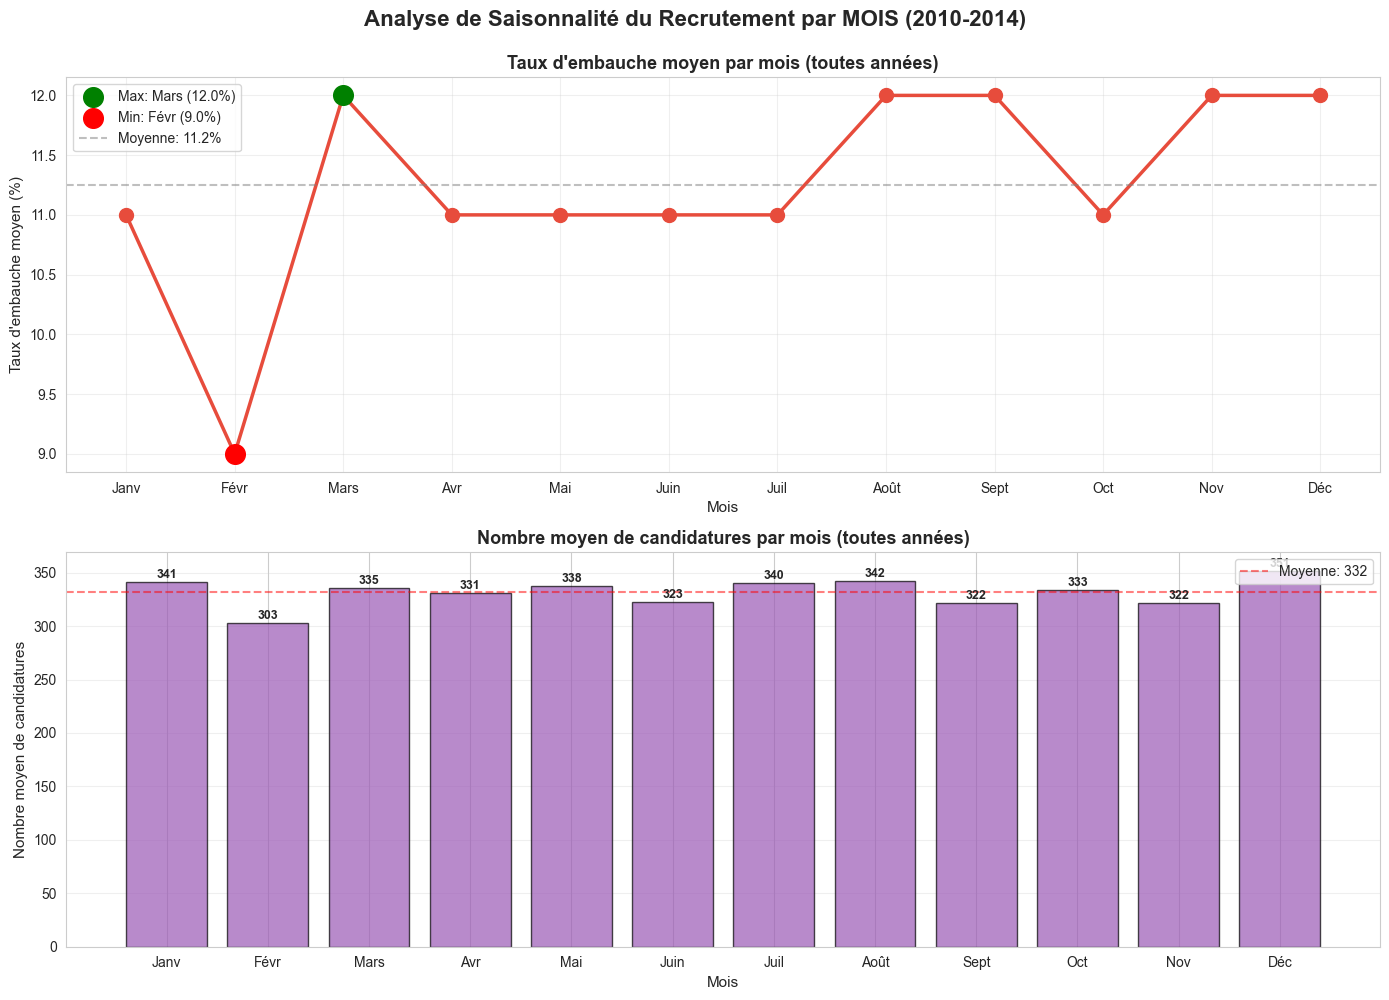

In [40]:
# =============================================================================
# ANALYSE PAR MOIS (TOUTES ANNÉES CONFONDUES)
# =============================================================================

print("\n" + "="*80)
print("ANALYSE PAR MOIS (toutes années confondues)")
print("="*80)

# Calculer les métriques moyennes par mois
mois_stats = df.groupby('mois').agg({
    'embauche': ['sum', 'count', 'mean'],
    'index': 'count'
}).round(2)

mois_stats.columns = ['nb_embauches', 'total_candidatures', 'taux_embauche', 'verification']
mois_stats['taux_embauche_pct'] = (mois_stats['taux_embauche'] * 100).round(2)

# Noms des mois en français
noms_mois = ['Janv', 'Févr', 'Mars', 'Avr', 'Mai', 'Juin', 
             'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc']

print("\nStatistiques moyennes par mois :")
print(mois_stats[['nb_embauches', 'total_candidatures', 'taux_embauche_pct']])

# =============================================================================
# CRÉER LES GRAPHIQUES
# =============================================================================

# Créer la figure avec 2 sous-graphiques pour les mois
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Analyse de Saisonnalité du Recrutement par MOIS (2010-2014)', 
             fontsize=16, fontweight='bold', y=0.995)

# Graphique 1 : Taux d'embauche moyen par mois
ax1.plot(mois_stats.index, mois_stats['taux_embauche_pct'], 
         marker='o', linewidth=2.5, markersize=10, color='#e74c3c')
ax1.set_title("Taux d'embauche moyen par mois (toutes années)", fontsize=13, fontweight='bold')
ax1.set_xlabel("Mois", fontsize=11)
ax1.set_ylabel("Taux d'embauche moyen (%)", fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(noms_mois)

# Mettre en évidence les valeurs min et max - VERSION CORRIGÉE
max_idx = mois_stats['taux_embauche_pct'].idxmax()
min_idx = mois_stats['taux_embauche_pct'].idxmin()

# Conversion en entier pour l'indexation
max_idx_int = int(max_idx)
min_idx_int = int(min_idx)

ax1.scatter([max_idx], [mois_stats.loc[max_idx, 'taux_embauche_pct']], 
           color='green', s=200, zorder=5, label=f'Max: {noms_mois[max_idx_int-1]} ({mois_stats.loc[max_idx, "taux_embauche_pct"]:.1f}%)')
ax1.scatter([min_idx], [mois_stats.loc[min_idx, 'taux_embauche_pct']], 
           color='red', s=200, zorder=5, label=f'Min: {noms_mois[min_idx_int-1]} ({mois_stats.loc[min_idx, "taux_embauche_pct"]:.1f}%)')
ax1.legend(loc='best')

# Ajouter une ligne horizontale pour la moyenne
moyenne_taux = mois_stats['taux_embauche_pct'].mean()
ax1.axhline(y=moyenne_taux, color='gray', linestyle='--', alpha=0.5, 
            label=f'Moyenne: {moyenne_taux:.1f}%')
ax1.legend(loc='best')

# Graphique 2 : Nombre moyen de candidatures par mois
candidatures_moyennes = mois_stats['total_candidatures'] / df['annee'].nunique()
ax2.bar(mois_stats.index, candidatures_moyennes, color='#9b59b6', alpha=0.7, edgecolor='black')
ax2.set_title("Nombre moyen de candidatures par mois (toutes années)", fontsize=13, fontweight='bold')
ax2.set_xlabel("Mois", fontsize=11)
ax2.set_ylabel("Nombre moyen de candidatures", fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(noms_mois)

# Ajouter les valeurs sur les barres
for i, v in enumerate(candidatures_moyennes, start=1):
    ax2.text(i, v + 1, f'{v:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Ajouter une ligne horizontale pour la moyenne
moyenne_cand = candidatures_moyennes.mean()
ax2.axhline(y=moyenne_cand, color='red', linestyle='--', alpha=0.5, 
            label=f'Moyenne: {moyenne_cand:.0f}')
ax2.legend(loc='best')

plt.tight_layout()
plt.savefig('analyse_mois_saisonnalite.png', dpi=300, bbox_inches='tight')
print("\n✓ Graphique sauvegardé : analyse_mois_saisonnalite.png")
plt.show()


ANALYSE PAR MOIS DÉTAILLÉE (par année)
✓ Graphique sauvegardé : analyse_mois_detaille.png


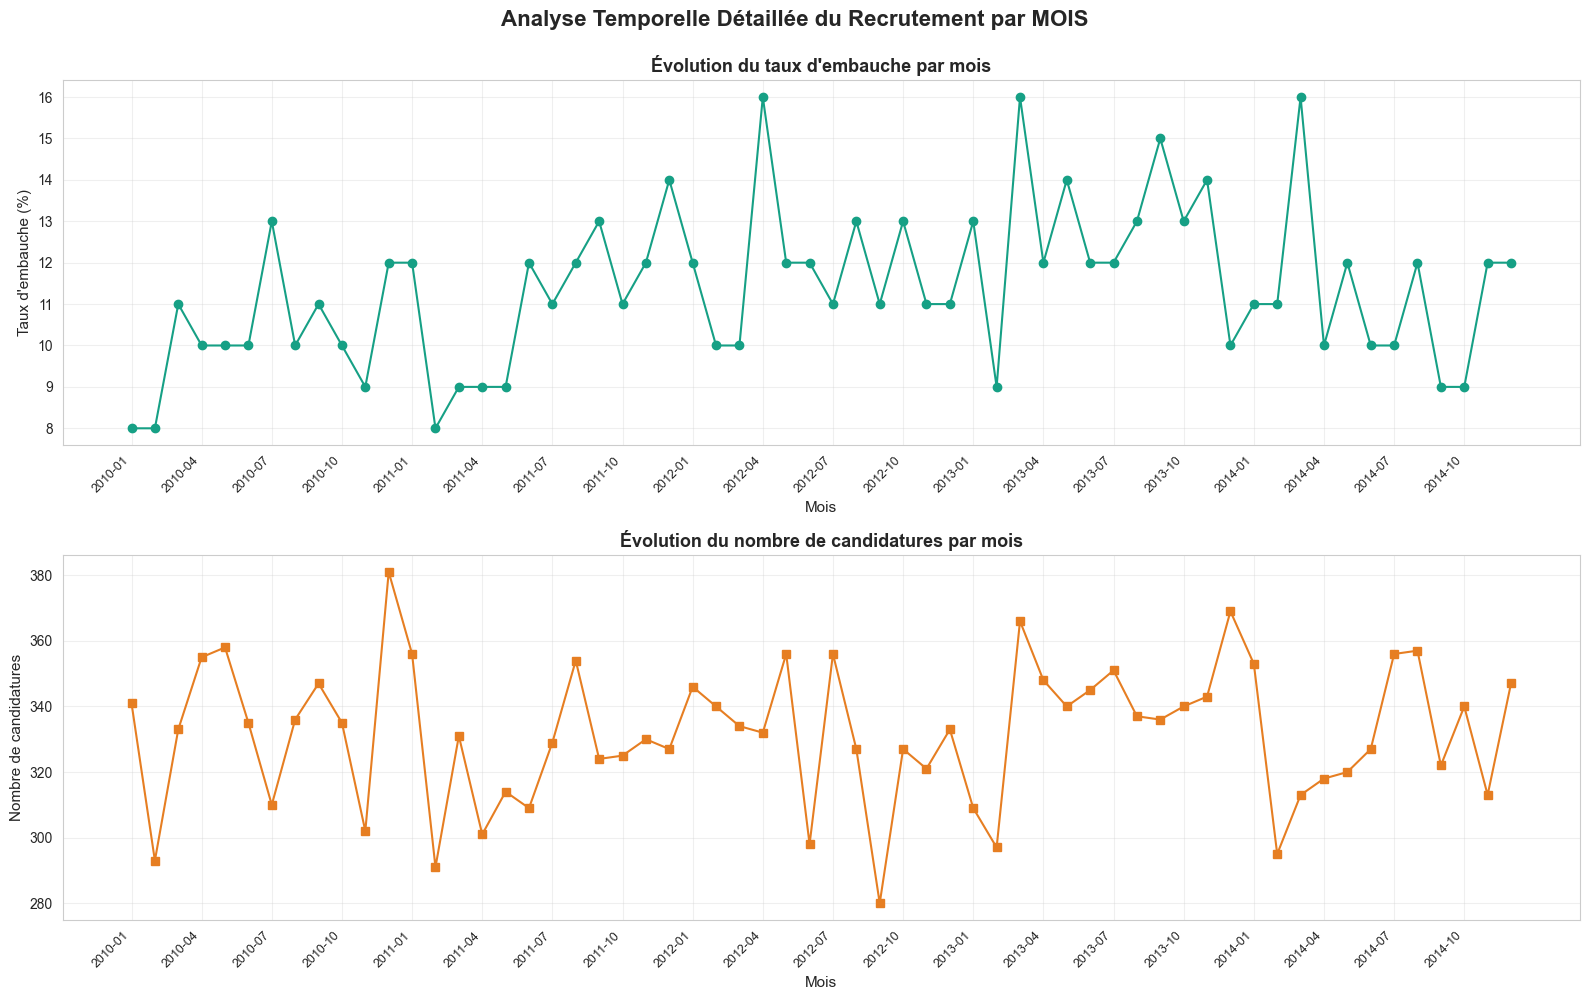

In [39]:
# =============================================================================
# ANALYSE PAR MOIS DÉTAILLÉE (PAR ANNÉE)
# =============================================================================

print("\n" + "="*80)
print("ANALYSE PAR MOIS DÉTAILLÉE (par année)")
print("="*80)

# Calculer les métriques par année-mois
mois_annee_stats = df.groupby('annee_mois').agg({
    'embauche': ['sum', 'count', 'mean'],
}).round(2)

mois_annee_stats.columns = ['nb_embauches', 'total_candidatures', 'taux_embauche']
mois_annee_stats['taux_embauche_pct'] = (mois_annee_stats['taux_embauche'] * 100).round(2)

# Créer la figure avec 2 sous-graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Analyse Temporelle Détaillée du Recrutement par MOIS', 
             fontsize=16, fontweight='bold', y=0.995)

# Graphique 1 : Taux d'embauche mensuel
ax1.plot(range(len(mois_annee_stats)), mois_annee_stats['taux_embauche_pct'], 
         marker='o', linewidth=1.5, markersize=6, color='#16a085')
ax1.set_title("Évolution du taux d'embauche par mois", fontsize=13, fontweight='bold')
ax1.set_xlabel("Mois", fontsize=11)
ax1.set_ylabel("Taux d'embauche (%)", fontsize=11)
ax1.grid(True, alpha=0.3)

# Afficher certaines étiquettes de mois pour plus de lisibilité
step = max(1, len(mois_annee_stats) // 20)
ax1.set_xticks(range(0, len(mois_annee_stats), step))
ax1.set_xticklabels([str(mois_annee_stats.index[i]) for i in range(0, len(mois_annee_stats), step)], 
                    rotation=45, ha='right', fontsize=9)

# Graphique 2 : Nombre de candidatures mensuel
ax2.plot(range(len(mois_annee_stats)), mois_annee_stats['total_candidatures'], 
         marker='s', linewidth=1.5, markersize=6, color='#e67e22')
ax2.set_title("Évolution du nombre de candidatures par mois", fontsize=13, fontweight='bold')
ax2.set_xlabel("Mois", fontsize=11)
ax2.set_ylabel("Nombre de candidatures", fontsize=11)
ax2.grid(True, alpha=0.3)

ax2.set_xticks(range(0, len(mois_annee_stats), step))
ax2.set_xticklabels([str(mois_annee_stats.index[i]) for i in range(0, len(mois_annee_stats), step)], 
                    rotation=45, ha='right', fontsize=9)

plt.tight_layout()
plt.savefig('analyse_mois_detaille.png', dpi=300, bbox_inches='tight')
print("✓ Graphique sauvegardé : analyse_mois_detaille.png")
plt.show()

=====================================================
#### SECTION 6 : SYNTHÈSE DE L'AED
=====================================================


**Contexte et objectif**
Dataset de recrutement comportant **20 000 candidatures** sur la période 2010-2014, avec pour objectif de prédire l'embauche (variable cible binaire : 0 = non embauché, 1 = embauché).


**INSIGHTS CLÉS POUR LA MODÉLISATION**

**Points d'attention majeurs**

1. **Déséquilibre des classes (88% vs 12%)** 
   → Nécessite techniques de rééquilibrage (SMOTE, class_weight, etc.)

2. **Pouvoir prédictif individuel faible**
   → Les variables prises isolément discriminent peu ; rechercher des interactions/combinaisons

3. **Corrélation SALAIRE-NOTE négative**
   → Pourrait indiquer que les profils académiques élevés sous-estiment leur valeur ou que l'entreprise privilégie l'expérience au diplôme

4. **Paradoxe du doctorat**
   → Taux d'embauche le plus faible malgré le niveau le plus élevé (surqualification ? inadéquation avec les postes ?)

5. **Effet temporel non négligeable**
   → Intégrer des features temporelles (mois, trimestre, année) pourrait améliorer les performances

6. **Variable CHEVEUX non discriminante**
   → Peut être écartée de la modélisation (aucun lien logique avec l'embauche)

**Recommandations préparation des données**

**Nettoyage obligatoire**
- Supprimer/corriger les âges négatifs et incohérences âge-expérience
- Traiter les notes > 100 (normalisation ou suppression)
- Imputer les valeurs manquantes (médiane pour numériques, mode pour catégorielles)

**Encodage et normalisation**
- One-Hot Encoding pour variables nominales (cheveux, spécialité)
- Label Encoding pour variables ordinales (diplôme) et binaires (sexe, dispo)
- Standardisation des variables numériques (StandardScaler)

**Feature Engineering**
- Créer ratio EXP/AGE (expérience relative)
- Extraire mois/trimestre de la date de candidature
- Tester interactions diplôme × expérience, note × diplôme

**Gestion du déséquilibre**
- Tester SMOTE (oversampling minoritaire)
- Utiliser class_weight='balanced' dans les modèles
- Évaluer avec F1-score et ROC-AUC plutôt qu'accuracy


**CONCLUSION**

Le dataset présente une **qualité globalement bonne** avec peu de valeurs manquantes, mais nécessite un nettoyage ciblé des incohérences identifiées. Le principal défi réside dans le **fort déséquilibre des classes** et le **faible pouvoir prédictif individuel des variables**, suggérant que la décision d'embauche repose sur des combinaisons complexes de critères plutôt que sur des seuils simples.

L'analyse temporelle révèle un phénomène contre-intuitif où la qualité des candidatures semble inversement proportionnelle à leur volume, soulignant l'importance d'une approche qualitative du recrutement. Les modèles de machine learning devront intégrer ces subtilités via des techniques avancées (ensembles, tuning, feature engineering) pour capturer les patterns de décision réels du processus de recrutement.

**Prochaines étapes** : Préparation rigoureuse des données, test de plusieurs algorithmes (Logistic Regression, Random Forest, XGBoost), optimisation des hyperparamètres et interprétation métier des résultats.